<h1>MSSV: 22521034</h1>
<h1>Họ tên: Huỳnh Yến Nhi</h1>

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Câu 1: Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện

In [6]:
train = pd.read_csv("adult.data.csv")
test = pd.read_csv("adult.test.csv")

In [19]:
print(f"Số lượng dữ liệu huấn luyện: {len(train)}")
print(f"Số lượng dữ liệu kiểm thử: {len(test)}")

Số lượng dữ liệu huấn luyện: 32561
Số lượng dữ liệu kiểm thử: 16281


In [8]:
train

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

Câu 2

- Xóa những dòng có chứa dữ liệu trống ở tập train

In [21]:
train.replace(' ?',np.nan,inplace=True)
train=train.dropna()

In [23]:
train

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[30162 rows x 15 columns]

- Xóa những dòng có dữ liệu trống trên tập test

In [31]:
test.replace(' ?',np.nan,inplace=True)
test=test.dropna()

In [33]:
test

age      workclass      education  education-num       marital-status  \
0       25        Private           11th              7        Never-married   
1       38        Private        HS-grad              9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm             12   Married-civ-spouse   
3       44        Private   Some-college             10   Married-civ-spouse   
5       34        Private           10th              6        Never-married   
...    ...            ...            ...            ...                  ...   
16275   33        Private      Bachelors             13        Never-married   
16276   39        Private      Bachelors             13             Divorced   
16278   38        Private      Bachelors             13   Married-civ-spouse   
16279   44        Private      Bachelors             13             Divorced   
16280   35   Self-emp-inc      Bachelors             13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
5           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
16275      Prof-specialty       Own-child                White     Male   
16276      Prof-specialty   Not-in-family                White   Female   
16278      Prof-specialty         Husband                White     Male   
16279        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
16280     Exec-managerial         Husband                White     Male   

       capital-gain  capital-loss  hours-per-week  native-country  income  
0                 0             0              40   United-States   <=50K  
1                 0             0              50   United-States   <=50K  
2                 0             0              40   United-States    >50K  
3              7688             0              40   United-States    >50K  
5                 0             0              30   United-States   <=50K  
...             ...           ...             ...             ...     ...  
16275             0             0              40   United-States   <=50K  
16276             0             0              36   United-States   <=50K  
16278             0             0              50   United-States   <=50K  
16279          5455             0              40   United-States   <=50K  
16280             0             0              60   United-States    >50K  

[15060 rows x 14 columns]

- Xóa cột final weight

In [35]:
if 'fnlwgt' in train:
    train = train.drop(columns=['fnlwgt'])

- Nối dữ liệu huấn luyện

In [37]:
data = pd.concat([train, test], ignore_index=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


 Câu 3: Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson.

In [44]:
data2 = data.select_dtypes(include='int64')

<Axes: >

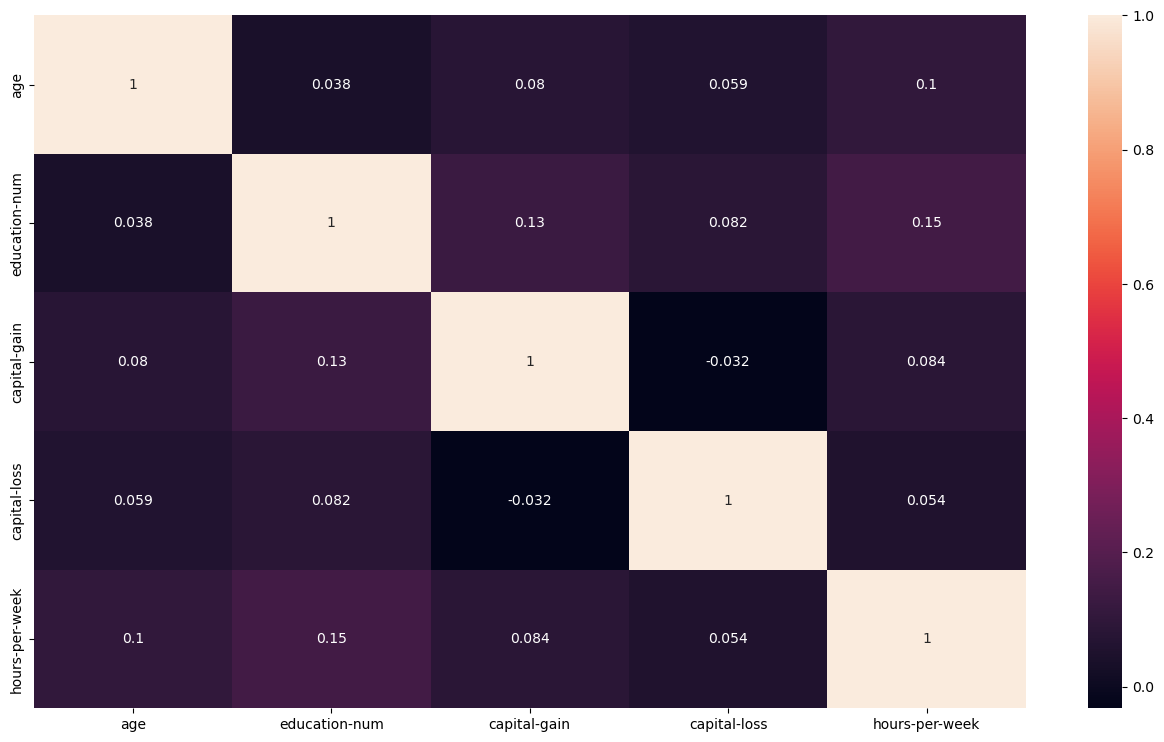

In [50]:
plt.figure(figsize=(16,9))
sns.heatmap(data2.corr(method='pearson'), annot=True)

Nhận thấy, không có thuộc tính nào tương đồng cao với nhau nên không cần thiết
phải loại bỏ cột nào.

Câu 4: Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
phần chứa riêng thuộc tính quyết định.

In [72]:
features = data.drop('income',axis=1)
labels = data['income']

Câu 5: Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu
vào của thư viện.

In [74]:
features.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [76]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
45217   33             13             0             0              40   
45218   39             13             0             0              36   
45219   38             13             0             0              50   
45220   44             13          5455             0              40   
45221   35             13             0             0              60   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       False                 False               False   
1                       False                 False               False   
2                       False                 False                True   
3                       False                 False                True   
4                       False                 False                True   
...                       ...                   ...                 ...   
45217                   False                 False                True   
45218                   False                 False                True   
45219                   False                 False                True   
45220                   False                 False                True   
45221                   False                 False               False   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        False                        False  ...   
1                        False                         True  ...   
2                        False                        False  ...   
3                        False                        False  ...   
4                        False                        False  ...   
...                        ...                          ...  ...   
45217                    False                        False  ...   
45218                    False                        False  ...   
45219                    False                        False  ...   
45220                    False                        False  ...   
45221                     True                        False  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
...                         ...                          ...   
45217                     False                        False   
45218                     False                        False   
45219                     False                        False   
45220                     False                        False   
45221                     False                        False   

       native-country_ Scotland  native-country_ South  \
0                         False                  False   
1                         False                  False   
2                         False                  False   
3                         False                  False   
4                         False                  False   
...                         ...                    ...   
45217                     False                  False   
45218                     False                  False   
45219                     False                  False   
45220                     False                  False   
45221

Câu 6: Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.
Tiến hành tách dữ liệu huấn luyện và kiểm thử như thông tin thu được ban đầu.

In [78]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

Câu 7: Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả
của cây bằng ma trận nhầm lẫn.

In [82]:
clf= tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [86]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.8175298804780876
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



In [90]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

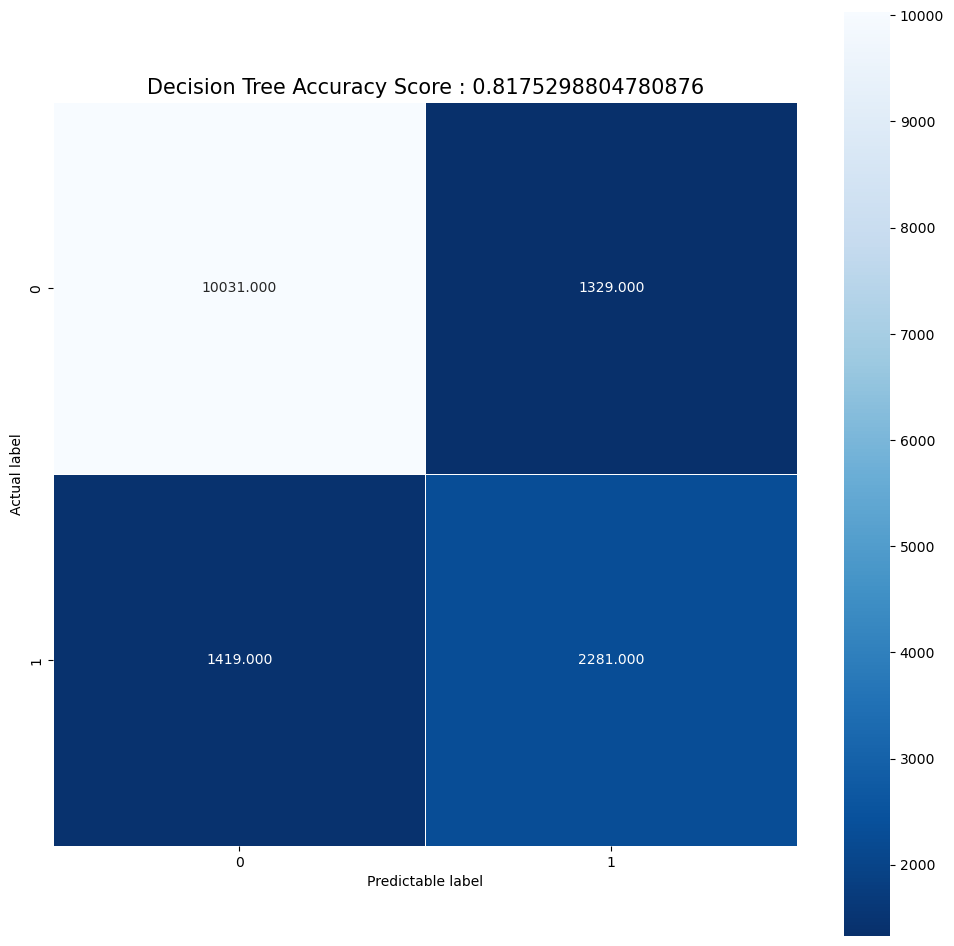

In [94]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predictable label');
title = 'Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size=15);
plt.show()

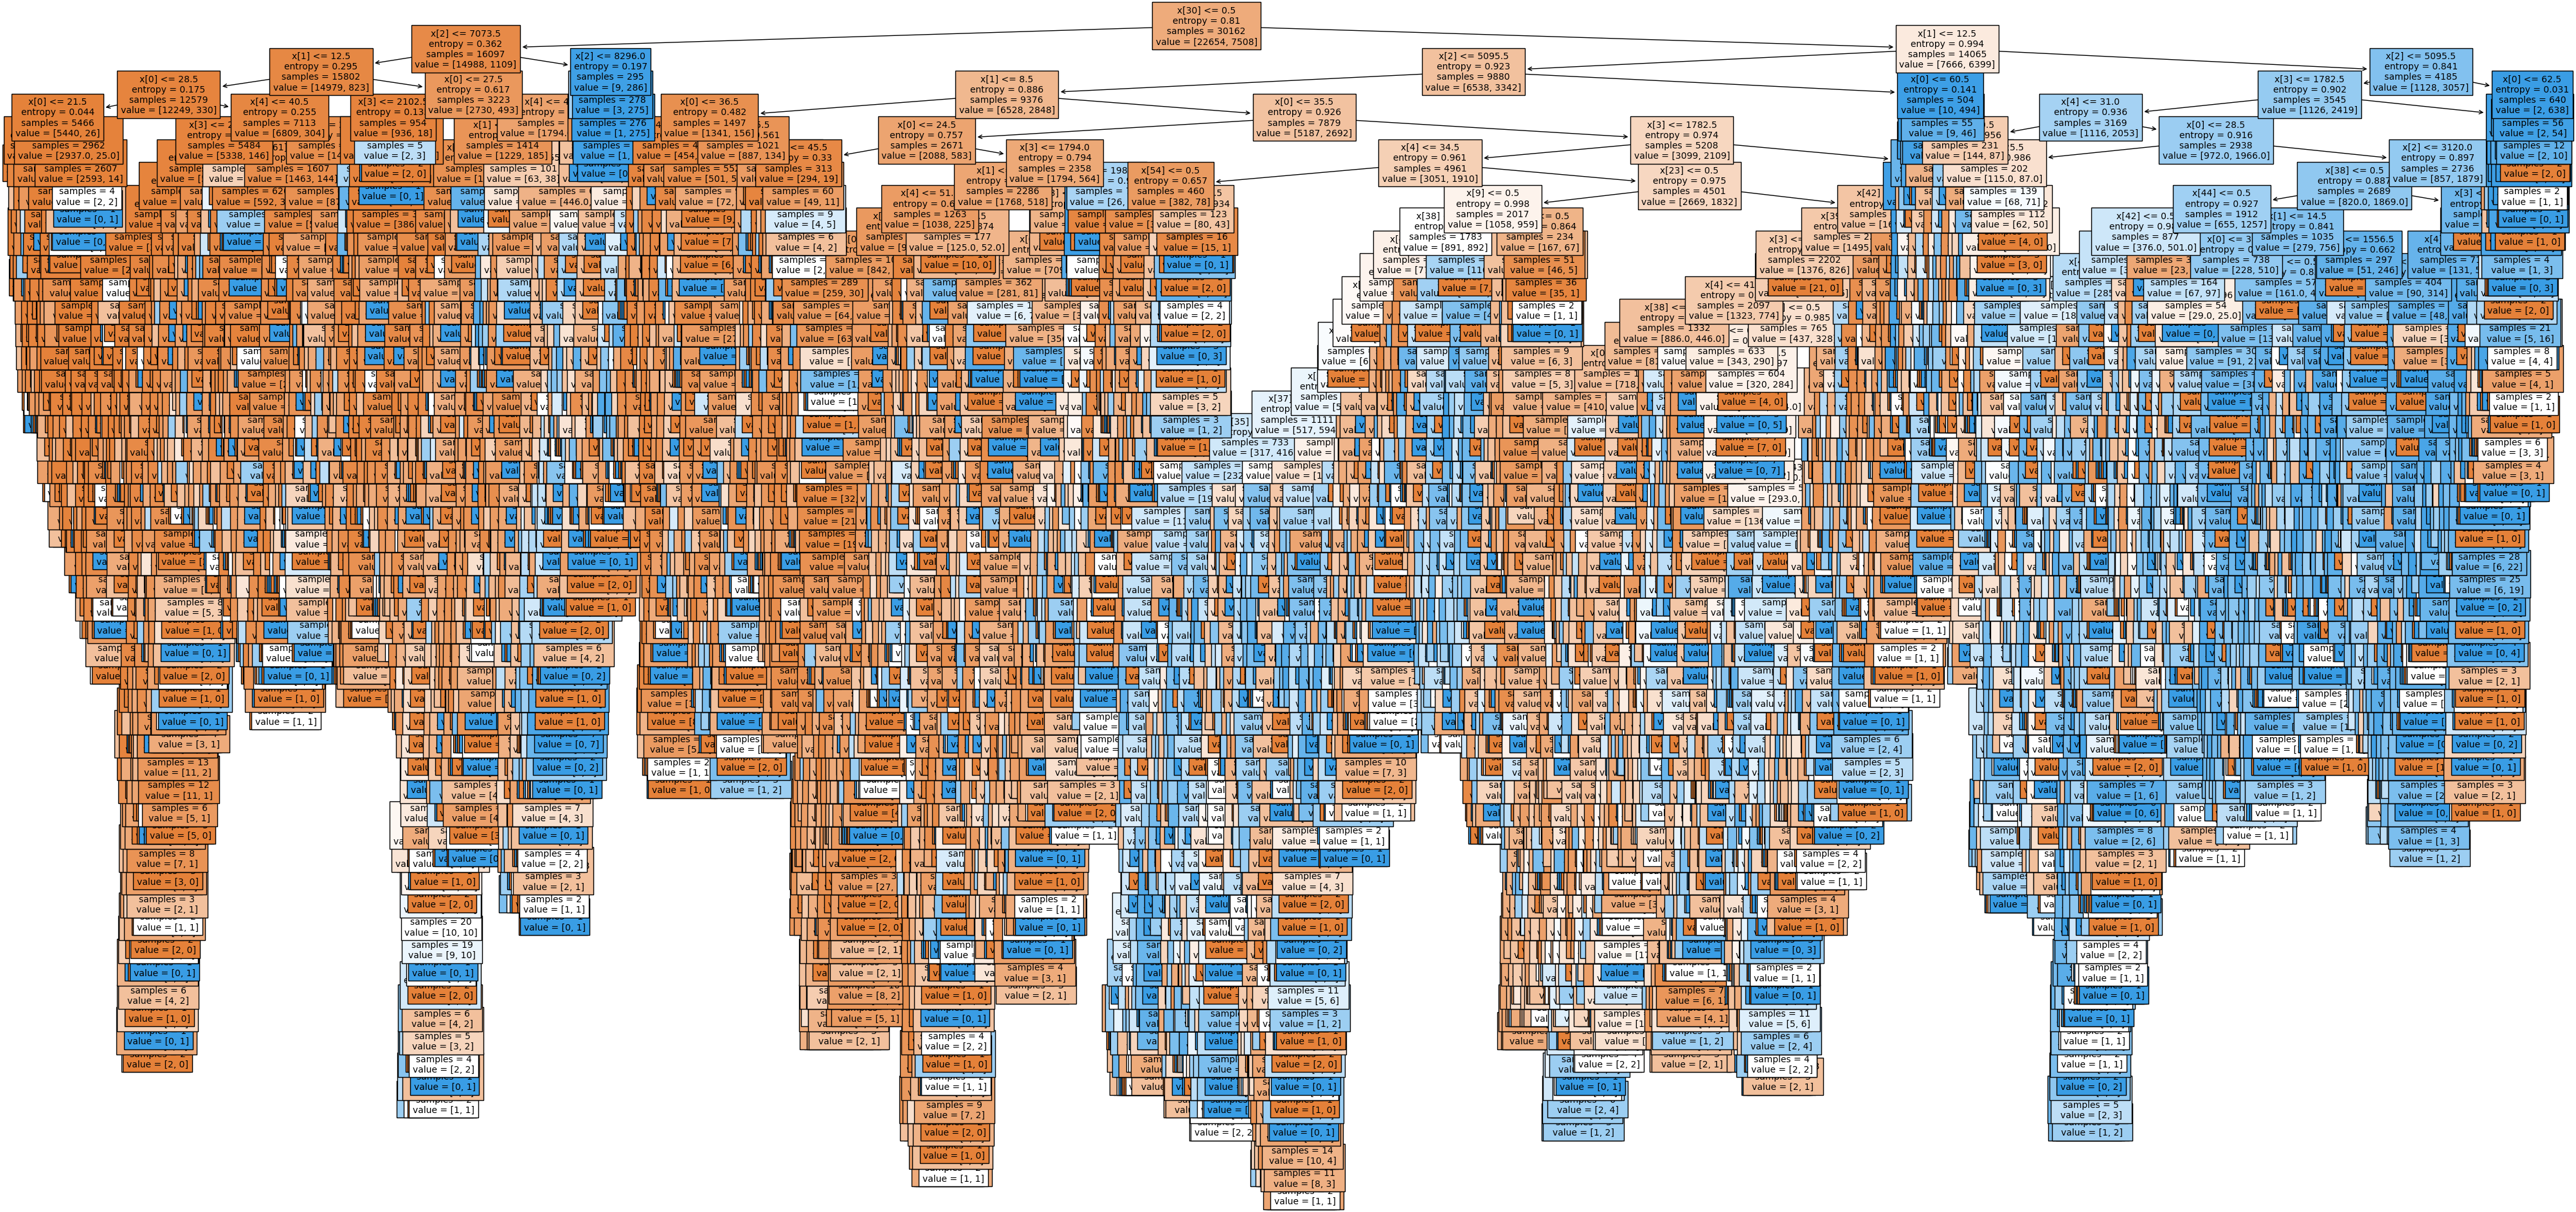

In [96]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

Câu 8

In [97]:
clf= tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [99]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.8122841965471448
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



In [ ]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

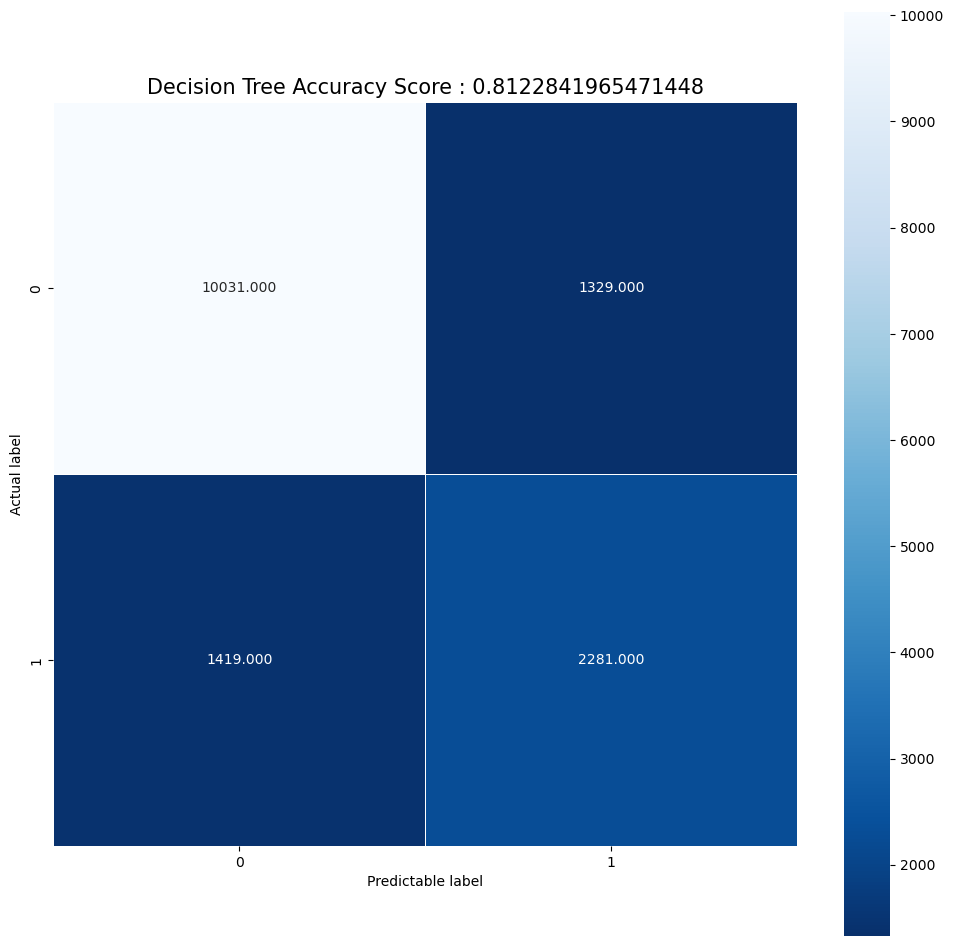

In [100]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predictable label');
title = 'Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size=15);
plt.show()

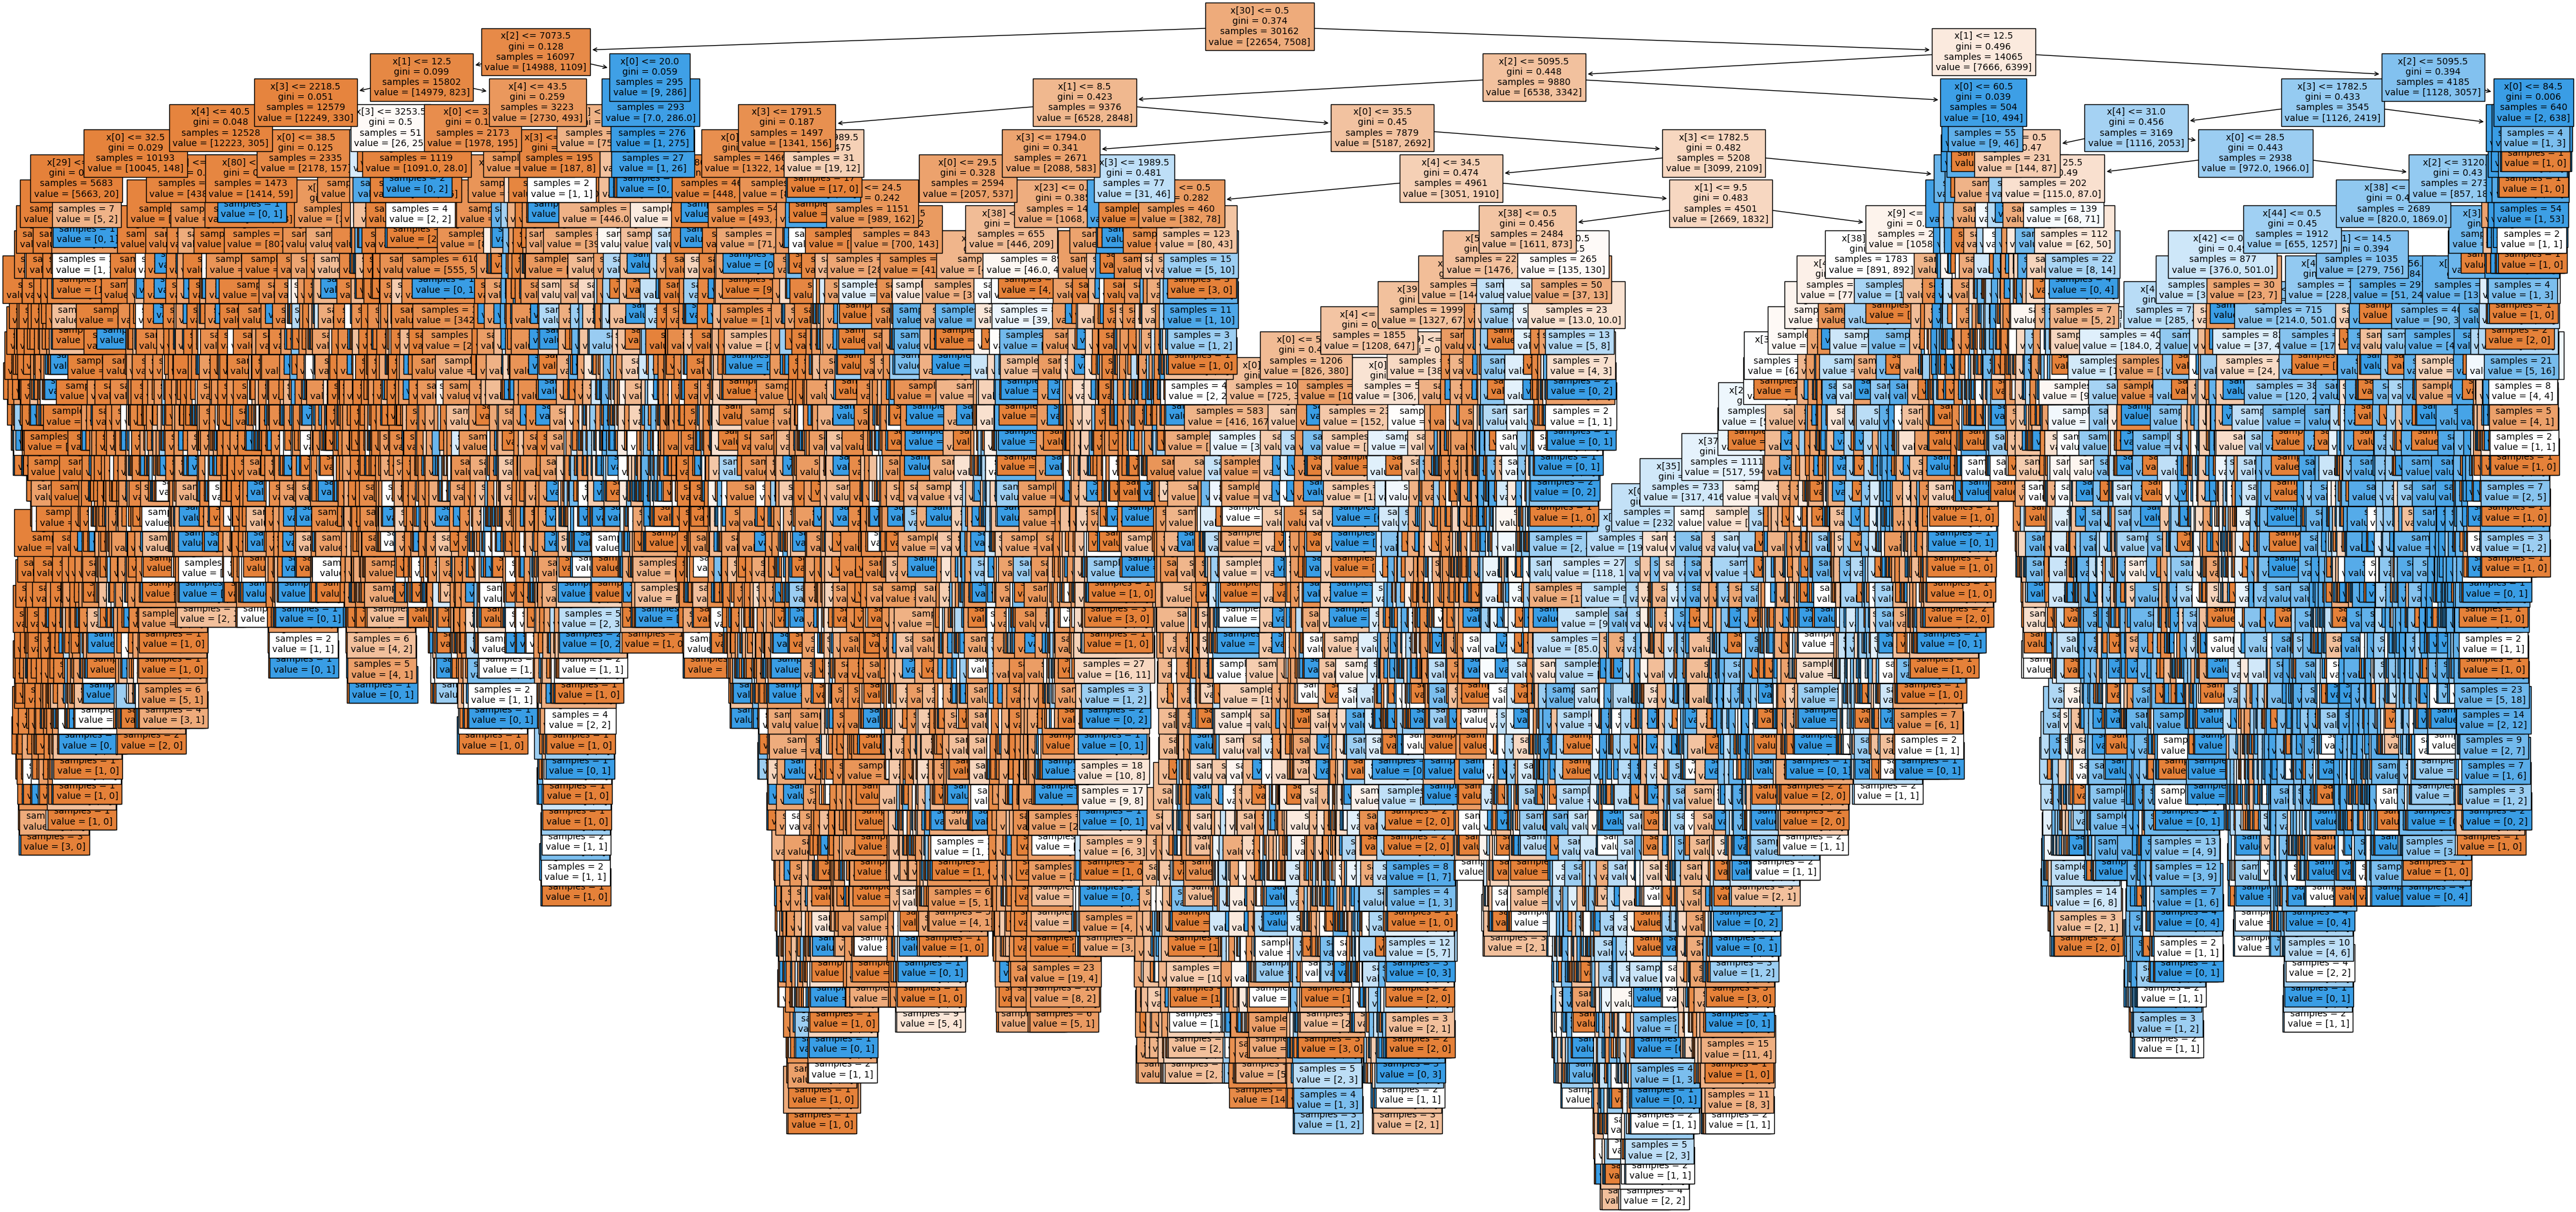

In [112]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

Câu 9: Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt
được.

In [106]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train,y_train).predict(X_test)

In [108]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test,bayes_pred))

Accuracy: 0.8029216467463479
Report:               precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



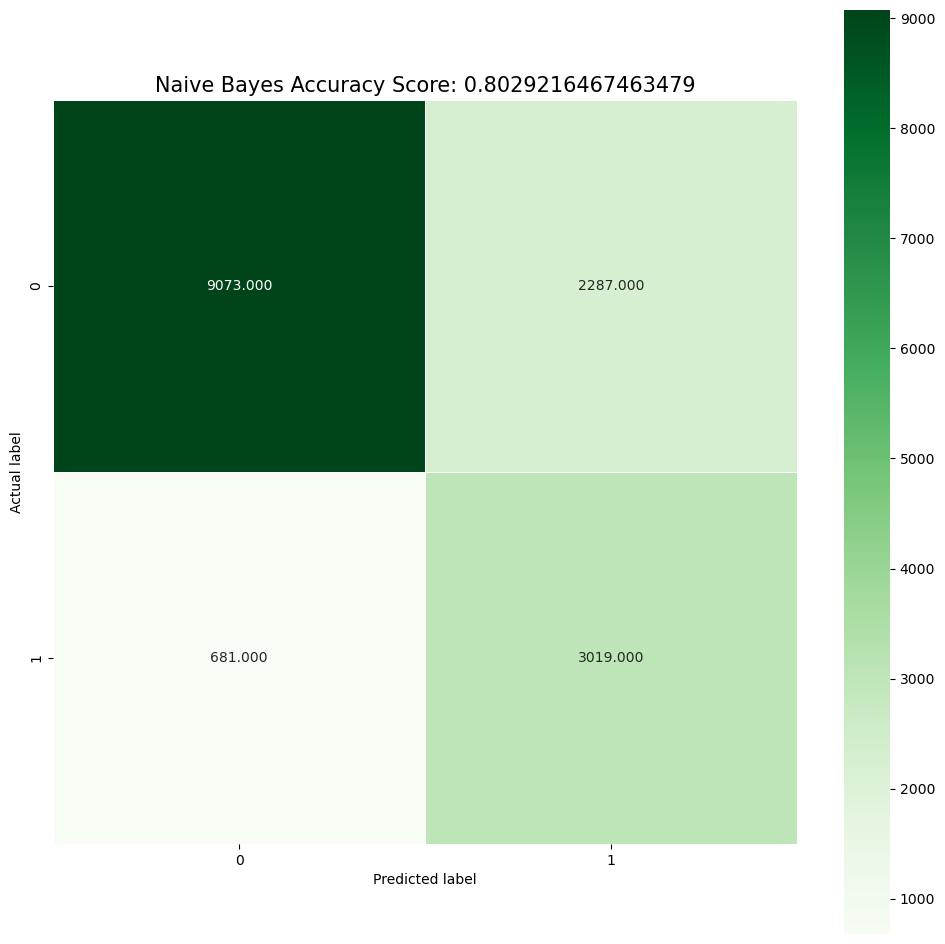

In [110]:
bayes_cm = metrics.confusion_matrix(y_test,bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True,fmt=".3f",linewidths=.5, square=True,cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title,size=15);

Câu 10: So sánh
Dựa vào mô hình ta thấy độ chính xác của các thuật toán như sau:
ID3        :81.75%;
Naive Bayes:80.29%;
CART       :81.23%;
Do đó với việc sử dụng thuật toán Native Bayes cho độ chính xác cao nhất.